<a href="https://colab.research.google.com/github/Yatharth31/DL-LAB/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
x,y = datasets.make_blobs(n_samples = 150, n_features = 2, centers = 2, cluster_std =1.05, random_state=2)

In [ ]:
import tensorflow as tp
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

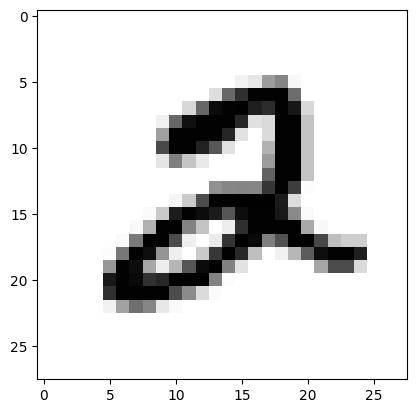

In [ ]:
plt.imshow(x_train[5],cmap='binary')
print(x_train[5])


In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print(y_train[5],y_train_encoded[5])
print(y_train[0],y_train_encoded[0])

2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print("y_train encoded shape ", y_train_encoded.shape)
print("y_test encoded shape ", y_test_encoded.shape)


y_train encoded shape  (60000, 10)
y_test encoded shape  (10000, 10)


#Preprocessing

In [ ]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)


(60000, 784)
(10000, 784)


In [ ]:
# display pixel value
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
# Data normalization
import math
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = pow(math.e,-10)


In [ ]:
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

#MODEL


In [ ]:
#Creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compiling model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#Training the model
model.fit(x_train_norm , y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3750 - accuracy: 0.8906
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1848 - accuracy: 0.9461
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1407 - accuracy: 0.9593


#Evaluation

In [ ]:
#Evaluating the model
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Testset Accuracy=',accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1317 - accuracy: 0.9600
Testset Accuracy= 95.99999785423279


In [ ]:
model.predict([x_test_norm])

313/313 [==============================] - 1s 2ms/step


array([[3.63923282e-05, 8.05742900e-07, 1.04591883e-04, ...,
        9.97176051e-01, 3.04033779e-06, 7.00296732e-05],
       [8.43504677e-04, 6.48661226e-04, 9.91666019e-01, ...,
        8.99195982e-07, 5.78898587e-04, 2.62506408e-08],
       [8.27020049e-05, 9.86365497e-01, 1.95389311e-03, ...,
        6.22051628e-03, 1.40126236e-03, 8.54265818e-04],
       ...,
       [1.32967543e-07, 7.23850868e-10, 2.85799638e-06, ...,
        2.50416866e-04, 6.76568656e-04, 1.03933830e-03],
       [2.65195795e-05, 1.28064194e-05, 8.40809093e-07, ...,
        7.37831627e-08, 1.01518686e-04, 3.83083801e-07],
       [5.20275571e-05, 7.87212457e-07, 2.10772501e-04, ...,
        2.33158826e-08, 3.31194542e-07, 2.46407296e-07]], dtype=float32)